## pair0052: 

x and y are 4-dimensional variables for day 51 resp. 50 of year 2000 on a 144x73 grid (2.5 degree).  The four dimensions are:


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from diptest import diptest 

In [42]:
# Load and clean data raw data file 
data_x, data_y = [], []
with open('datasets/pair0052.txt', 'r') as file:
    for line in file:
        # Split each line on tab to separate X and Y data
        x_values, y_values = line.strip().split('\t')
        
        # Further split X and Y on whitespace and convert to integers
        x_values = [int(val) for val in x_values.split()]
        y_values = [int(val) for val in y_values.split()]
        
        data_x.append(x_values)
        data_y.append(y_values)

# Convert to DataFrames
df_x = pd.DataFrame(data_x, columns=['Temp_X', 'Surface_Pressure_X', 'Sea_Level_Pressure_X', 'Humidity_X'])
df_y = pd.DataFrame(data_y, columns=['Temp_Y', 'Surface_Pressure_Y', 'Sea_Level_Pressure_Y', 'Humidity_Y'])

# Combine into a single DataFrame for easier manipulation
df = pd.concat([df_x, df_y], axis=1)

In [43]:
# Display some rows to verify the data is loaded correctly
print(df.head())

   Temp_X  Surface_Pressure_X  Sea_Level_Pressure_X  Humidity_X  Temp_Y  \
0  -26796              -27344                -27328      -27314  -27296   
1  -27209              -27184                -27156      -27128  -27102   
2  -26984              -26959                -26928      -26903  -26881   
3  -26794              -26777                -26761      -26744  -26734   
4  -26699              -26694                -26691      -26689  -26684   

   Surface_Pressure_Y  Sea_Level_Pressure_Y  Humidity_Y  
0              -27277                -27253      -27234  
1              -27069                -27044      -27014  
2              -26856                -26831      -26809  
3              -26724                -26716      -26706  
4              -26678                -26678      -26678  


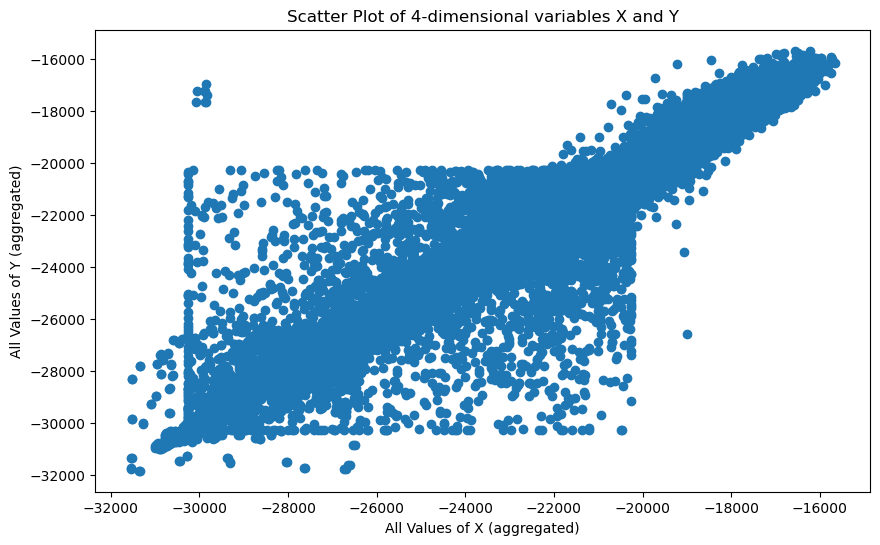

In [44]:
# Flatten all values of x and y into single arrays
x_values = np.concatenate(df[['Temp_X', 'Surface_Pressure_X', 'Sea_Level_Pressure_X', 'Humidity_X']].values)
y_values = np.concatenate(df[['Temp_Y', 'Surface_Pressure_Y', 'Sea_Level_Pressure_Y', 'Humidity_Y']].values)

# Plot a single scatter plot with all x and y values
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.xlabel('All Values of X (aggregated)')
plt.ylabel('All Values of Y (aggregated)')
plt.title('Scatter Plot of 4-dimensional variables X and Y')
plt.show()

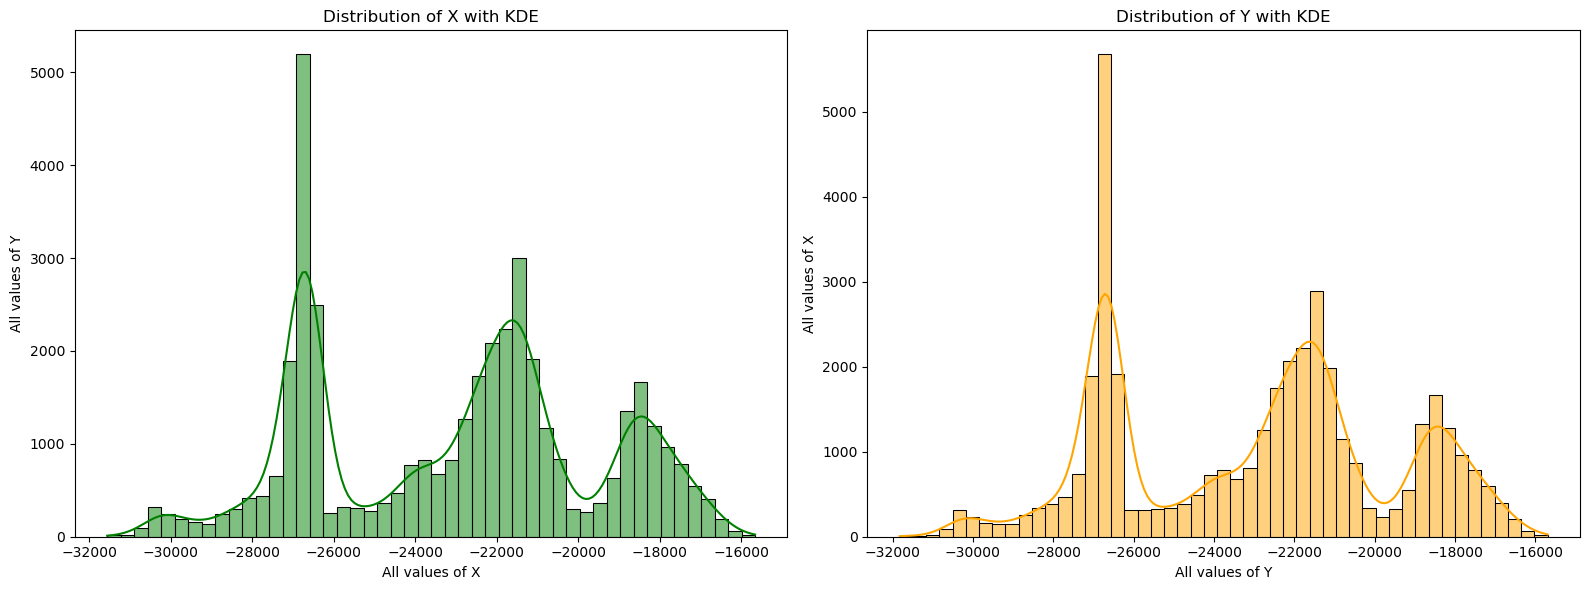

In [45]:

# Plot the distribution of the data in both directions (x and y)
fig, axis = plt.subplots(1, 2, figsize=(16,6))

# Plot for (X -> Y)
sns.histplot(x_values, kde=True, ax=axis[0], color='green')
axis[0].set_xlabel('All values of X')
axis[0].set_ylabel('All values of Y')
axis[0].set_title('Distribution of X with KDE')

# Plot for (Y -> X)
sns.histplot(y_values, kde=True, ax=axis[1], color='orange')
axis[1].set_xlabel('All values of Y')
axis[1].set_ylabel('All values of X')
axis[1].set_title('Distribution of Y with KDE')

# Adjust layout to set the title and labels
plt.tight_layout()
plt.show()
    

In [46]:
# Dip-Test for x and y
dip_test, p_val = diptest(x_values)
print(f"Dip-Test (X  → Y): {dip_test}, p-value: {p_val}")   
dip_test, p_val = diptest(y_values)
print(f"Dip-Test (Y  → X): {dip_test}, p-value: {p_val}")
    

Dip-Test (X  → Y): 0.07253193547874537, p-value: 0.0
Dip-Test (Y  → X): 0.07198810393870457, p-value: 0.0


### Findings:
- The ground truth relationship is Y → X
- The dip test results suggest that the distribution of X → Y and Y → X is likely **multimodal**,  supported by a low p-value 0.